# About Dataset 

you can get this data from UCL Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
data=pd.read_csv(r"C:\Users\kolli\Downloads\Datasets\concrete_data.csv")
data=data.drop(['Water','Coarse Aggregate','Fine Aggregate'],axis=1)

In [2]:
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength
0,540.0,0.0,0.0,2.5,28,79.99
1,540.0,0.0,0.0,2.5,28,61.89
2,332.5,142.5,0.0,0.0,270,40.27
3,332.5,142.5,0.0,0.0,365,41.05
4,198.6,132.4,0.0,0.0,360,44.30
5,266.0,114.0,0.0,0.0,90,47.03
6,380.0,95.0,0.0,0.0,365,43.70
7,380.0,95.0,0.0,0.0,28,36.45
8,266.0,114.0,0.0,0.0,28,45.85
9,475.0,0.0,0.0,0.0,28,39.29


# Exploratory Data Analysis

<font color='317455'>In EDA we take a look at the data and understand the variables. <br>
<font color='blue'>Now we walkover the data inorder to understand it better and find if there are any useful patterns which we can identify or any outliers and missing values. we also look into correlation matrix to identify if there is any multicollinearity

In [3]:
print("The shape of the Dataset is:",data.shape)

The shape of the Dataset is: (1030, 6)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Superplasticizer    1030 non-null   float64
 4   Age                 1030 non-null   int64  
 5   Strength            1030 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 48.4 KB


<font color='blue'> Lets have a look about the data using .describe() method to better understand the data like mean,standard deviation and other information.  

In [5]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,6.204660,45.662136,35.817961
std,104.506364,86.279342,63.997004,5.973841,63.169912,16.705742
min,102.000000,0.000000,0.000000,0.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,0.000000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,6.400000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,10.200000,56.000000,46.135000
max,540.000000,359.400000,200.100000,32.200000,365.000000,82.600000


<font color='blue'> <h2>Sweetviz</h2> is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. 
<br><font color='green'> we can also compare two dataframes using Sweetviz...!!

In [6]:
#import sweetviz as sv

#my_report = sv.analyze(data)

In [7]:
#my_report.show_html()

<h2>Finding Correlation </h2>

<font color='blue'>Here i have written a function that drops the Null values and replace it with NaN. 
<br> i have used a pearson coefficient and it shows if there any columns with correlation > 85. we are gonna drop these because of Multicollinearity.

The Columns with correlation >0.85 are : []
The Remaining columns after dropping correlated columns are: ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'Strength']


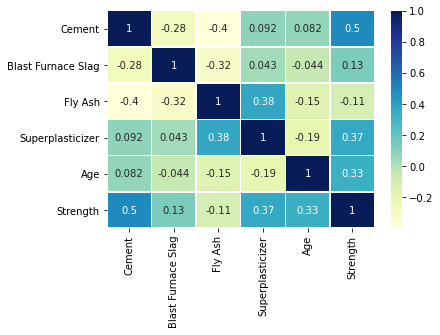

In [8]:
def corr(data):
    data=data.dropna(how='any')                  # to drop null values
    data=data.replace(np.nan, 'NaN', regex=True) #to replace Null values with NaN
    crln =data.corr(method='pearson')            #applying pearson correlation
    upper = crln.where(np.triu(np.ones(crln.shape),k=1).astype(np.bool)) 
    to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  #Dropping columns with correlation >0.85
    df1 = data.drop(to_drop,axis=1)
    print("The Columns with correlation >0.85 are :",to_drop)
    print("The Remaining columns after dropping correlated columns are:",list(df1))
    sb.heatmap(crln, xticklabels=crln.columns,yticklabels=crln.columns,cmap='YlGnBu',annot=True,linewidth=0.5)   
corr(data)

<font color='blue'>we can clearly see that there are no multi correlated variables .
   <br> Let us have look on the Distributions of Data Variables

# Calculating VIF

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vdata=data.copy()
vdata=vdata.drop(['Strength'], axis=1)
vif_data = pd.DataFrame() 
vif_data["feature"] = vdata.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vdata.values, i) 
                          for i in range(len(vdata.columns))] 
  
print(vif_data)

              feature       VIF
0              Cement  2.819482
1  Blast Furnace Slag  1.526264
2             Fly Ash  1.879115
3    Superplasticizer  2.921784
4                 Age  1.550374


<b>Note:</b> <font color='blue'>As the VIF Values for 'Water','Fine Aggregate','Coarse Aggregate' are very high so i m dropping those values.

<AxesSubplot:xlabel='Strength'>

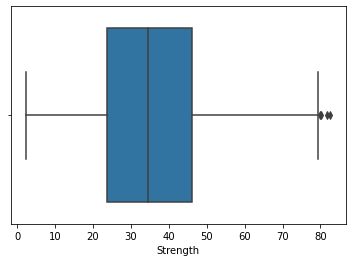

In [10]:
import seaborn as sns
sns.boxplot(x=data['Strength'])

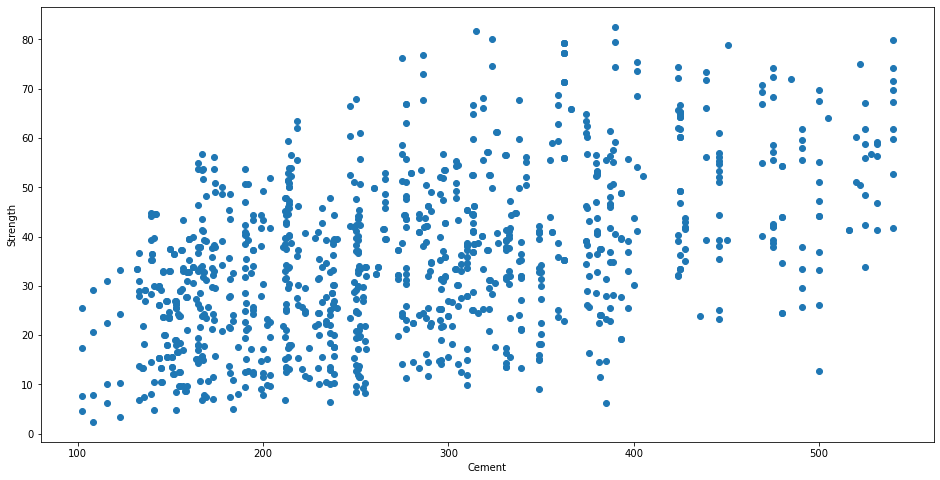

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Cement'] , data['Strength'])
ax.set_xlabel('Cement')
ax.set_ylabel('Strength')
plt.show()

C:\Users\kolli\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Strength'>

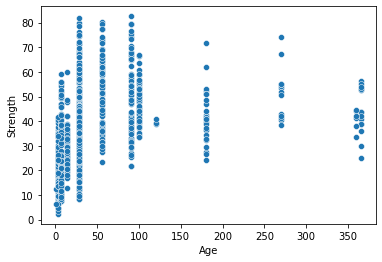

In [12]:
sns.scatterplot('Age','Strength', data=data)

<AxesSubplot:xlabel='Cement', ylabel='Strength'>

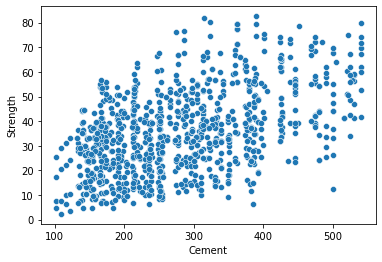

In [13]:
sns.scatterplot(x='Cement',y='Strength', data=data)

<font color='blue'> it is observed that increase in cement quantity also increase in strength.

C:\Users\kolli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


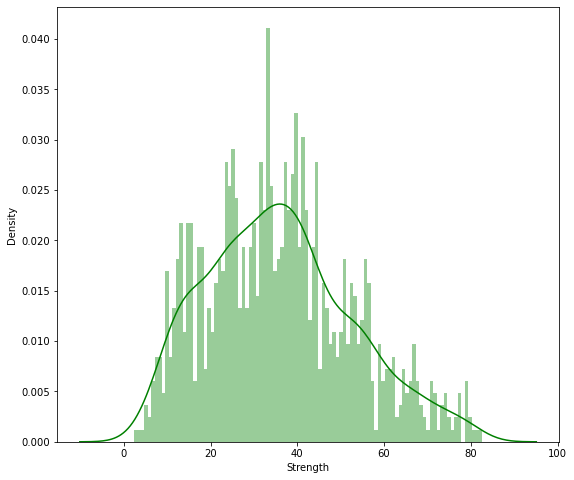

In [14]:
plt.figure(figsize=(9, 8))
sns.distplot(data['Strength'], color='g', bins=100, hist_kws={'alpha': 0.4});

<h2> Numerical Data Distribution </h2>
    <br> For this part lets look at the distribution of all of the features by ploting them

<br>To do so lets first list all the types of our data from our dataset and take only the numerical ones:

array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag'}>],
       [<AxesSubplot:title={'center':'Fly Ash'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

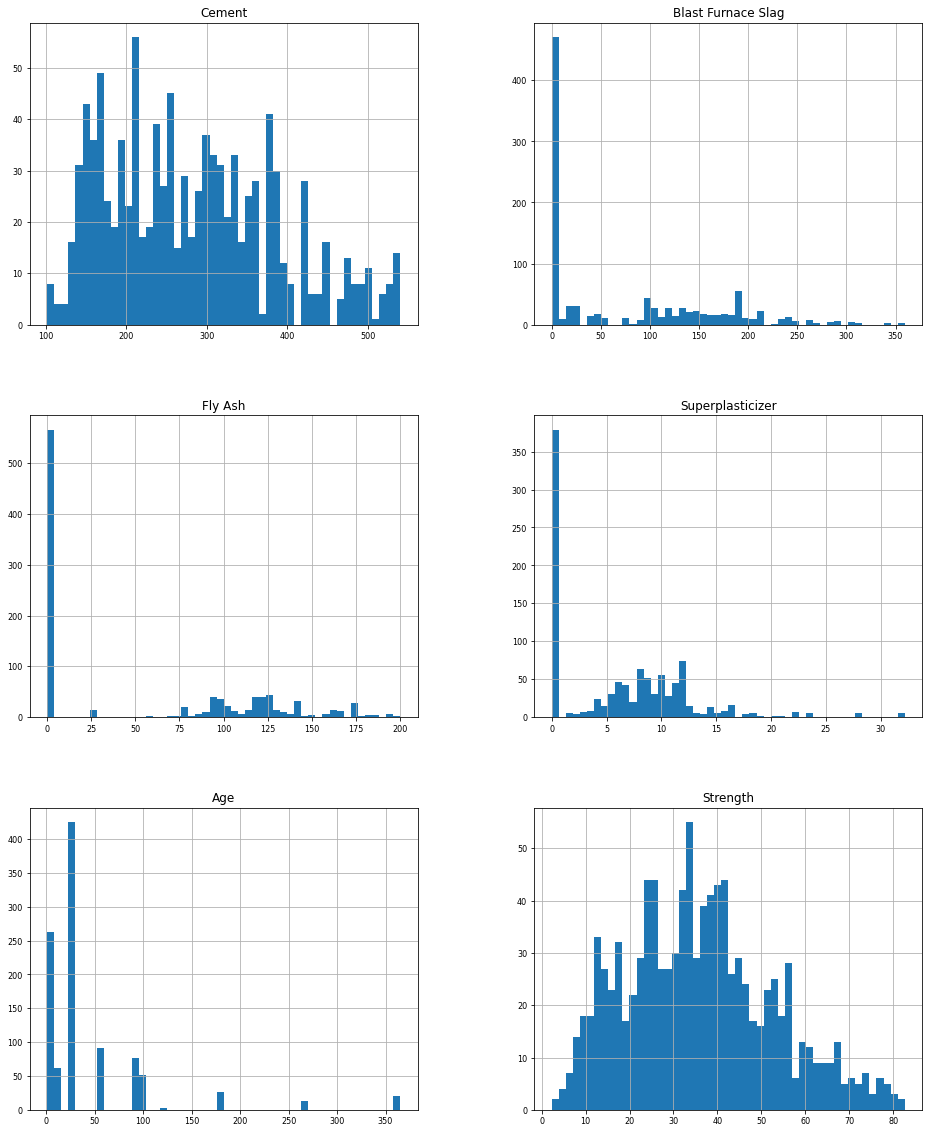

In [15]:
plots = data.select_dtypes(include = ['float64', 'int64'])
plots.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

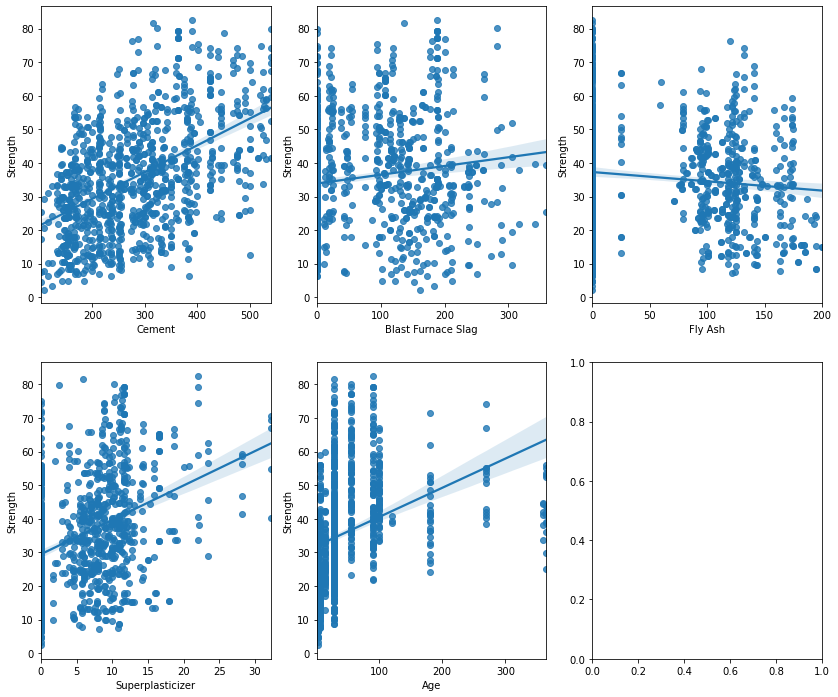

In [16]:
df=list(data)
fig, ax = plt.subplots(round(len(df) / 3), 3, figsize = (14, 12))
for i, ax in enumerate(fig.axes):
    if i < len(df) - 1:
        sns.regplot(x=df[i],y='Strength', data=data[df], ax=ax)

<h2>Data Scaling</h2>
<br>In this the data will be scaled in the range 0 to 1 using sklearn 

In [17]:
X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<b> Model Implementation 

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
#qqplot
#import statsmodels.api as sm
#import pylab as py
#sm.qqplot(data[''], line ='45') 
#py.show()
#regressor.intercept_
#regressor.coef_

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,26.06,40.535964
1,74.36,55.198667
2,56.50,60.960374
3,38.61,44.458025
4,12.54,19.910906


In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square:',r2_score(y_test,y_pred))

Mean Absolute Error: 9.029736313947474
Mean Squared Error: 138.5296238884281
Root Mean Squared Error: 11.769860827062828
R Square: 0.4727740859681523


<b><font color='purple'> Now lets build all the models and check their MSE, RMSE, R SQUARE of all those models.

In [23]:
#Bayesian Ridge Regression Model
from sklearn.linear_model import BayesianRidge
br_model = BayesianRidge(compute_score = True)
br_model.fit(X_train, y_train)
predict_y = br_model.predict(X_test)

In [24]:
#Support Vector Regression
from sklearn.svm import SVR
svr_model = SVR(C=0.8, kernel = 'linear')
svr_model.fit(X_train, y_train)
predict_y = svr_model.predict(X_test)

In [25]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1,criterion='mse')
rf_model.fit(X_train, y_train)
predict_y = rf_model.predict(X_test)

In [26]:
#Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)
dt_model.fit(X_train, y_train)
predict_y = dt_model.predict(X_test)

# Compare MSE of all Models

In [27]:
models = [regressor, svr_model, br_model, rf_model, dt_model]
model_names = ['Linear Regression Model', 'Support Vector Regression Model', 'BayesianRidge Regression Model', 'Random Forest Regression Model', 'Decision Tree Regression Model']
for model,model_name in zip(models,model_names):
    mse = mean_squared_error(model.predict(X_test),y_test)
    print(f"{model_name} MSE = {mse}")

Linear Regression Model MSE = 138.5296238884281
Support Vector Regression Model MSE = 168.03094603640253
BayesianRidge Regression Model MSE = 138.26247714961605
Random Forest Regression Model MSE = 36.75162562305191
Decision Tree Regression Model MSE = 49.81146804207119


<h2> Compare RMSE of all Models 

In [28]:
from math import sqrt
models = [regressor, svr_model, br_model, rf_model, dt_model]
model_names = ['Linear Regression Model', 'Support Vector Regression Model', 'BayesianRidge Regression Model', 'Random Forest Regression Model', 'Decision Tree Regression Model']
for model,model_name in zip(models,model_names):
    rmse = sqrt(mean_squared_error(model.predict(X_test),y_test))
    print(f"{model_name} RMSE = {rmse}")


Linear Regression Model RMSE = 11.769860827062828
Support Vector Regression Model RMSE = 12.962675111118173
BayesianRidge Regression Model RMSE = 11.758506586706325
Random Forest Regression Model RMSE = 6.062311904137885
Decision Tree Regression Model RMSE = 7.0577239987173765


<h2>Compare R Square of all Models

In [29]:
for model,model_name in zip(models,model_names):
    r2 = model.score(X_test,y_test)
    print(f"{model_name} R Square = {r2}")

Linear Regression Model R Square = 0.4727740859681523
Support Vector Regression Model R Square = 0.36049585191230216
BayesianRidge Regression Model R Square = 0.47379081206324547
Random Forest Regression Model R Square = 0.8601280443316903
Decision Tree Regression Model R Square = 0.8104239654263372


<h2>compare the Predicted Values of Various Models

In [30]:
for model,model_name in zip(models,model_names):
    val = model.predict([[475,0,0,0,28]])
    print(f"{model_name} Predicted value = {val}")

Linear Regression Model Predicted value = [5529.48357148]
Support Vector Regression Model Predicted value = [5425.31636782]
BayesianRidge Regression Model Predicted value = [5485.37856844]
Random Forest Regression Model Predicted value = [66.21761667]
Decision Tree Regression Model Predicted value = [74.17]


In [31]:
#Saving model to disk
pickle.dump(rf_model, open('concretemodel.pkl','wb'))

In [32]:
model = pickle.load(open('concretemodel.pkl','rb'))

In [33]:
print(model.predict([[475,0,0,0,28]]))

[66.21761667]
